## What is the most optimal skill to learn for Data Analysts?
### Methodology
1. Continue from last notebook to find percent of postings with skill
1. Visualize median salary vs percent skill demand
1. (Optional) Determine if certain technologies are more prevalent

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data
df = pd.read_csv('data_jobs.csv')

In [3]:
#Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_DA = df[df["job_title_short"] == "Data Analyst"].copy()
df_DA.dropna(subset="salary_year_avg", inplace=True)
df_DA_exploded = df_DA.explode("job_skills")
df_DA_exploded[["salary_year_avg","job_skills"]]


,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
785187,111175.0,sql
785187,111175.0,python
785187,111175.0,r
785187,111175.0,looker


In [5]:
df_DA_skills = df_DA_exploded.groupby("job_skills")["salary_year_avg"].agg(["count","median"]).sort_values("count", ascending=False)
df_DA_skills.rename(columns={"count": "skill_count", "median": "median_salary"}, inplace=True)
job_count = df_DA["salary_year_avg"].count()
df_DA_skills["skill_percent"] = df_DA_skills["skill_count"] / job_count * 100
skill_percent = 5
df_DA_skills = df_DA_skills[df_DA_skills["skill_percent"] > skill_percent]

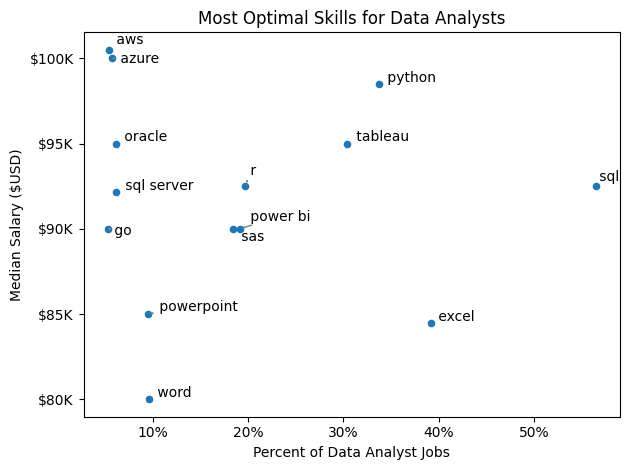

In [6]:
from adjustText import adjust_text

df_plot = df_DA_skills
df_plot.plot(kind="scatter", x="skill_percent", y="median_salary")

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts')

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

texts = []
for i, txt in enumerate(df_plot.index):
    texts.append(plt.text(df_plot["skill_percent"].iloc[i], df_plot["median_salary"].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'), min_arrow_len=3)

plt.tight_layout()
plt.show()

In [7]:
df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

In [8]:
technology_dict

{'analyst_tools': ['outlook',
  'power bi',
  'tableau',
  'powerpoint',
  'spss',
  'sharepoint',
  'dax',
  'splunk',
  'sap',
  'nuix',
  'esquisse',
  'looker',
  'spreadsheet',
  'microstrategy',
  'msaccess',
  'sas',
  'powerbi',
  'ssrs',
  'sheets',
  'ms access',
  'qlik',
  'visio',
  'excel',
  'ssis',
  'word',
  'alteryx',
  'datarobot',
  'cognos'],
 'programming': ['r',
  'css',
  'groovy',
  'sass',
  'julia',
  'c',
  'swift',
  'c++',
  'mongo',
  'sql',
  'rust',
  'ruby',
  'pascal',
  't-sql',
  'golang',
  'clojure',
  'delphi',
  'fortran',
  'dart',
  'python',
  'lua',
  'cobol',
  'lisp',
  'matlab',
  'elixir',
  'go',
  'powershell',
  'visual basic',
  'solidity',
  'objective-c',
  'ocaml',
  'typescript',
  'shell',
  'apl',
  'javascript',
  'kotlin',
  'sas',
  'php',
  'visualbasic',
  'f#',
  'haskell',
  'no-sql',
  'crystal',
  'html',
  'erlang',
  'vba',
  'mongodb',
  'perl',
  'vb.net',
  'c#',
  'nosql',
  'scala',
  'java',
  'assembly',
  'b

In [9]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,outlook
0,analyst_tools,power bi
0,analyst_tools,tableau
0,analyst_tools,powerpoint
0,analyst_tools,spss
...,...,...
9,sync,twilio
9,sync,slack
9,sync,google chat
9,sync,microsoft teams


In [10]:
df_plot = pd.merge(df_DA_skills, df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,3079,92500.0,56.485049,programming,sql
1,2135,84479.0,39.167125,analyst_tools,excel
2,1838,98500.0,33.718584,programming,python
3,1657,95000.0,30.398092,analyst_tools,tableau
4,1073,92527.5,19.684462,programming,r
5,1042,90000.0,19.115759,analyst_tools,power bi
6,1006,90000.0,18.455329,analyst_tools,sas
7,1006,90000.0,18.455329,programming,sas
8,523,80000.0,9.594570,analyst_tools,word
9,518,85000.0,9.502844,analyst_tools,powerpoint


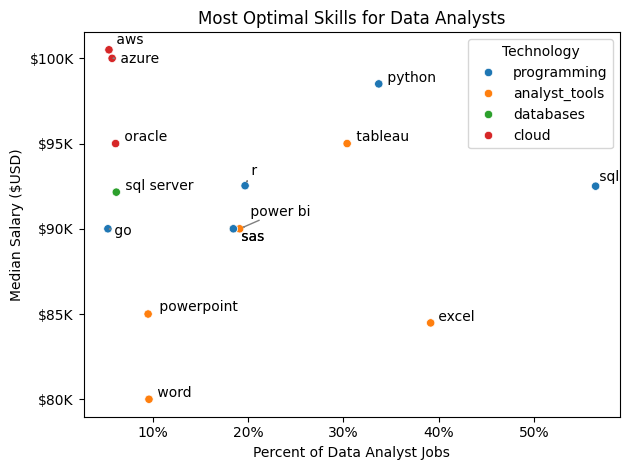

In [11]:
from turtle import title
from adjustText import adjust_text

sns.scatterplot(
    data=df_plot,
    x="skill_percent",
    y="median_salary",
    hue="technology"
)

plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts')
plt.legend(title="Technology")

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

texts = []
for i, txt in enumerate(df_plot["skills"]):
    texts.append(plt.text(df_plot["skill_percent"].iloc[i], df_plot["median_salary"].iloc[i], " " + txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.tight_layout()
plt.show()